In [2]:
include("biblioteca.jl")
using PyPlot

In [3]:
function  ϕ_matrix(ψj,Q,M)
    ϕ = zeros(Q,M)
    ξ = zglj(Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψj(i,ξ[j],M)
        end
    end
  return ϕ
end

ϕ_matrix (generic function with 1 method)

In [4]:
function Mass_matrix(ϕ,w,M,Q)
    L = zeros(M,M)
    for i in 1:M
        for j in 1:M
           m= 0.0
            for q in 1:Q
                m = m + ϕ[q,i]*ϕ[q,j]*w[q]
            end
            L[i,j] = m
        end
    end
    return L
end

Mass_matrix (generic function with 2 methods)

In [5]:
function ψj(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == 2)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 .* jacobi(E, p-3, 1, 1)
    end
end 

ψj (generic function with 1 method)

In [6]:
function dψj(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == 2)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 .* jacobi(E, p-3, 1, 1)
    end
end 

dψj (generic function with 1 method)

In [7]:
function fr_vector(fun,M,Q)
    fr = zeros(M)
    ξ = zglj(Q)
    for i in 1:M
        temp = 0.0
        for q in 1:Q
            temp = temp + fun(ξ[q])*ϕ[q,i]*w[q]
        end
        fr[i]= temp
    end
    return fr
end

fr_vector (generic function with 1 method)

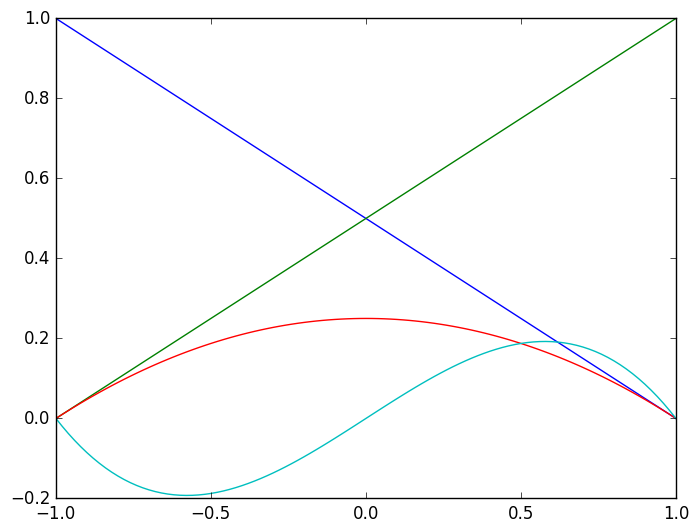

In [8]:

xx = [linspace(-1,1,101);]
for i in 1:4
    plot(xx,[ψj(i,x,4) for x in xx])
end

# Edo, Dirichlet u(-1) = 0 e u(1) = 0

\begin{equation}
   \ u(x) = f(x) \\
   \ \int_\Omega v(x)\ u(x) \partial x = \int_\Omega v(x)\ f(x) \partial x 
\end{equation}

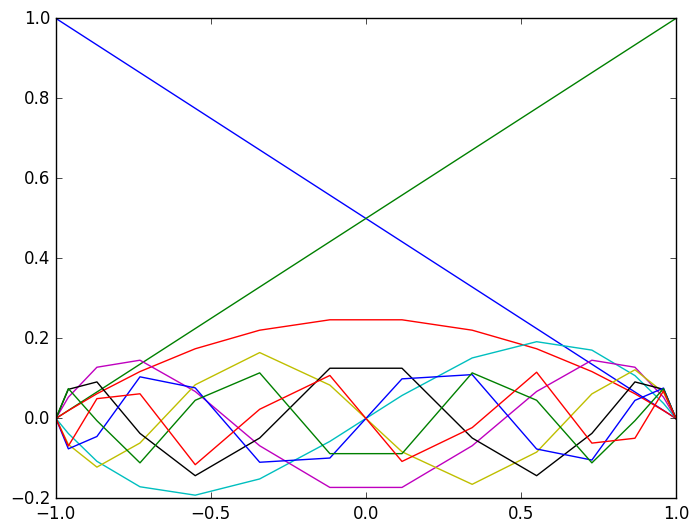

In [9]:
#######################
fun(x) = sin(x*2*pi)
#fun(x) = -x.^2 -2.*x + 5
#######################
Q = 14
I = 10
ξ = zglj(Q)
w = wglj(ξ,0.,0.)
ϕ = ϕ_matrix(ψj,Q,I)
M = Mass_matrix(ϕ,w,I,Q)
for i in 1:I
    plot(ξ,ϕ[:,i])
end

In [10]:
fr= fr_vector(fun,I,Q)

10-element Array{Float64,1}:
  0.159155   
 -0.159155   
 -2.38524e-17
 -0.0241887  
 -1.43115e-17
 -0.118368   
  1.71304e-17
  0.102717   
  3.90313e-18
 -0.0299446  

In [11]:
Mi = M[3:I,3:I]
uhi = Mi\fr[3:I]
uh2 = vcat([0, 0],uhi)

10-element Array{Float64,1}:
  0.0        
  0.0        
 -4.54177e-17
 -2.39223    
 -1.3286e-16 
 -5.27183    
 -1.0555e-16 
  2.89892    
 -2.19987e-16
 -0.678067   

In [12]:
uh = M\fr

10-element Array{Float64,1}:
 -0.0179894  
  0.0179894  
  4.24186e-15
 -2.47727    
  2.83002e-15
 -5.33807    
  2.04291e-15
  2.85073    
  9.66483e-16
 -0.704479   

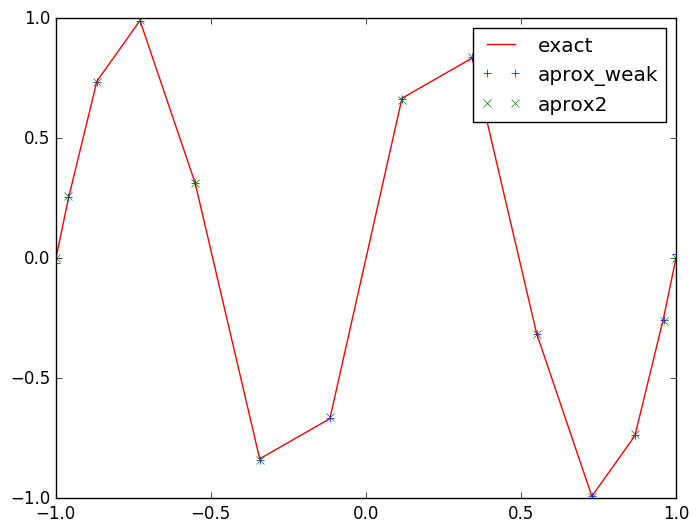

0.01798943577975164

In [13]:
uq1 = ϕ*uh
uq2 = ϕ*uh2
ue = fun(ξ)
plot(ξ,ue,label ="exact","red")
plot(ξ,uq1,label ="aprox_weak","+")
plot(ξ,uq2,label ="aprox2","x",color = "green")
legend()
maximum(ue-uq1)

LoadError: LoadError: UndefVarError: nb not defined
while loading In[15], in expression starting on line 1

8x8 Array{Float64,2}:
  0.0666667    -5.90213e-18  -0.0142857    …   2.03288e-19  -4.22839e-18
 -5.90213e-18   0.0380952     1.70762e-18     -6.4239e-18   -7.23705e-18
 -0.0142857     1.70762e-18   0.0285714        2.38524e-18  -5.42101e-20
  6.51877e-18  -0.0126984     7.31836e-19      3.57787e-18   2.05998e-18
  8.60585e-18   3.14419e-18  -0.0108225       -0.00815851    3.36103e-18
 -1.84314e-18   8.70072e-18  -1.51788e-18  …   2.22261e-18  -0.00723982 
  2.03288e-19  -6.4239e-18    2.38524e-18      0.0147813    -4.93312e-18
 -4.22839e-18  -7.23705e-18  -5.42101e-20     -4.93312e-18   0.0132095  